In [89]:
import json

In [90]:
# j'ouvre mon JSON et je recupere que le texte des tweets que je stock dans une liste
tweets = []
with open('like.js', 'r') as f:
    favorites = json.load(f)
    for t in favorites :
        tweets.append(t["like"]["fullText"])
        
print(len(tweets))

2362


In [91]:
# je transforme mon ensemble de tweet en une seule "phrase" que je met tout en minuscule
tweets_flatten = ''.join(tweets)
tweets_flatten = tweets_flatten.lower()
tweets_flatten = tweets_flatten.replace('#', '')
tweets_flatten = tweets_flatten.replace('@', '')
print(len(tweets_flatten))

412698


In [92]:
# je créer une liste où chaque élément est un mot
tweets_flatten_splitted = tweets_flatten.split()

print(len(tweets_flatten_splitted))

55416


In [105]:
# je definie les stop words et les supprime de ma data
english_stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]
french_stop_words = ["au","aux","avec","ce","ces","dans","de","des","du","elle","en","et","eux","il","je","la","le","leur","lui","ma","mais","me","même","mes","moi","mon","ne","nos","notre","nous","on","ou","par","pas","pour","qu","que","qui","sa","se","ses","son","sur","ta","te","tes","toi","ton","tu","un","une","vos","votre","vous","c","d","j","l","à","m","n","s","t","y","été","étée","étées","étés","étant","suis","es","est","sommes","êtes","sont","serai","seras","sera","serons","serez","seront","serais","serait","serions","seriez","seraient","étais","était","étions","étiez","étaient","fus","fut","fûmes","fûtes","furent","sois","soit","soyons","soyez","soient","fusse","fusses","fût","fussions","fussiez","fussent","ayant","eu","eue","eues","eus","ai","as","avons","avez","ont","aurai","auras","aura","aurons","aurez","auront","aurais","aurait","aurions","auriez","auraient","avais","avait","avions","aviez","avaient","eut","eûmes","eûtes","eurent","aie","aies","ait","ayons","ayez","aient","eusse","eusses","eût","eussions","eussiez","eussent","ceci","celà","cet","cette","ici","ils","les","leurs","quel","quels","quelle","quelles","sans","soi"]
custom_stop_words = ["&amp;", "#", "@", "-", "–", "!", "?", ":)", "it's"]

tweets_flatten_splitted = [x for x in tweets_flatten_splitted if x not in english_stop_words and x not in french_stop_words and x not in custom_stop_words]

print(len(tweets_flatten_splitted))

37197


In [106]:
# j'itere sur chaque mot (donc sur chaque element de ma list) et je calcul le nombre d'occurent EXACT de celui dans la phrase
wordfreq = []
for w in tweets_flatten_splitted:
    wordfreq.append(tweets_flatten_splitted.count(w))
print(len(wordfreq))

37197


In [107]:
# je fais une association clef valeur pour le mot et l'occurence de celui-ci
result = dict((zip(tweets_flatten_splitted, wordfreq)))
print(result["kubernetes"])

9


In [108]:
# je "trie" bon dictionnaire par valeur afin d'avoir les mots ayant la plus grand occurence en premier
sorted_x = sorted(result.items(), key=lambda x: x[1], reverse=True)

In [109]:
print(sorted_x)

[('new', 205), ('learning', 165), ('using', 143), ('graphics', 116), ('work', 112), ('blog', 107), ('vulkan', 101), ('rendering', 100), ('deep', 99), ('gamedev', 98), ('deeplearning', 87), ('like', 86), ('machinelearning', 86), ('gpu', 85), ('one', 81), ('code', 80), ('post', 79), ('nvidia', 78), ('ray', 78), ('see', 75), ('time', 71), ('great', 69), ('data', 67), ('datascience', 67), ('3d', 66), (':', 66), ('make', 65), ('get', 65), ('tracing', 64), ('first', 63), ('use', 61), ('good', 61), ('talk', 60), ('game', 60), ('support', 57), ('also', 57), ('machine', 57), ('check', 54), ('part', 54), ('neural', 53), ('learn', 53), ('still', 51), ('paper', 51), ('shader', 50), ('tensorflow', 49), ('model', 49), ('image', 48), ('open', 48), ('available', 47), ('vulkanapi', 47), ('c++', 46), ('next', 46), ('made', 46), ('many', 45), ("i'm", 45), ('engine', 44), ('look', 44), ('2', 44), ('ml', 44), ('source', 44), ('ia', 43), ('google', 42), ('article', 42), ('video', 42), ('real-time', 41), ('r

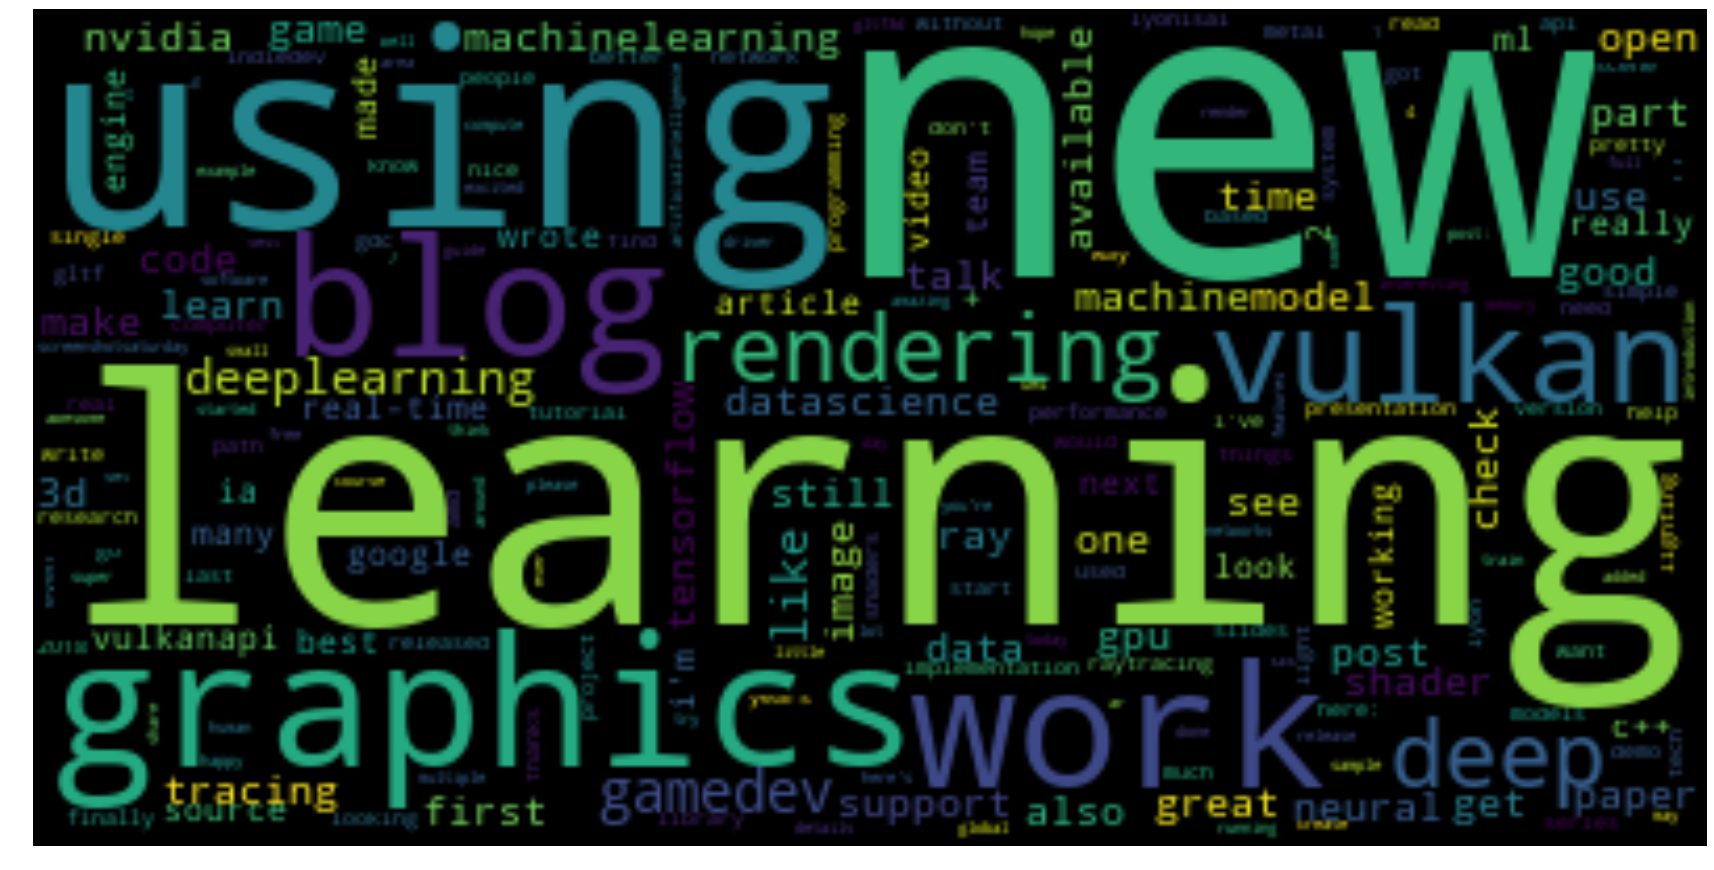

In [110]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#wordcloud = WordCloud(width=1600, height=800, max_words=2000).generate(" ".join(flat_text))
wordcloud = WordCloud().generate_from_frequencies(result)

plt.figure(figsize=(30, 30))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()